In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


# embedded methods
from sklearn.linear_model import LassoCV

# Encoding
from sklearn.preprocessing import LabelEncoder

# Modelling and report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier

# Imbalanced dataset
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('train.csv')
data_train.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [3]:
data_validation = pd.read_csv('test.csv')
data_validation.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [5]:
data_train.set_index('encounter_id', inplace = True)

In [6]:
# Count the occurrences of "?" or NaN in each column
question_mark_nan_count = data_train.applymap(lambda x: x == '?' or pd.isna(x)).sum()

# Calculate the percentage of "?" or NaN values in each column
percentage_question_mark_nan = (question_mark_nan_count / len(data_train)) * 100

# Print the result
print(percentage_question_mark_nan)  # values in percent

# --> Almost no values for weight, glucose_test_result, alc_test_result

country                                   0.000000
patient_id                                0.000000
race                                      7.117188
gender                                    0.000000
age                                       4.993262
weight                                   96.847100
payer_code                               39.588130
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.202426
medical_specialty                        49.022966
average_pulse_bpm                         0.000000
discharge_disposition                     3.635802
admission_source                          6.623056
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications                     0.000000
primary_diagnosis              

In [7]:
data_train.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,67682,6,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,67679,10,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,71236,10,?,68990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,71236,18,?,28201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0
inpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.640154,1.267271,0.0,0.0,0.0,1.0,21.0


In [8]:
data_train['readmitted_binary'].value_counts()

readmitted_binary
No     63286
Yes     7950
Name: count, dtype: int64

# Pre Processing

In [9]:
# too many missing values
data_train = data_train.drop(columns=['weight', 'payer_code', 'medical_specialty', 'glucose_test_result', 'a1c_test_result', 'patient_id'])

In [10]:
data_train = data_train.drop(columns=['country']) ## only 1 country

In [11]:
data_train.head()

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,average_pulse_bpm,discharge_disposition,admission_source,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,Female,[70-80),0,0,2,Emergency,127,Discharged to home,Emergency Room,...,20,515,276,466,8,No,No,[],No,>30 days
426224,AfricanAmerican,Male,[50-60),0,0,0,Emergency,128,Discharged/transferred to a federal health car...,Clinic Referral,...,25,38,785,162,9,No,Yes,['insulin'],No,No
634063,Caucasian,Female,[60-70),0,0,1,NaN,94,Discharged to home,NaN,...,22,534,135,250,6,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,AfricanAmerican,Male,[60-70),0,0,1,Emergency,81,Discharged to home,Transfer from another health care facility,...,9,569,562,455,5,No,No,[],No,No
654194,Caucasian,Female,[70-80),1,0,0,Elective,126,Discharged/transferred to home with home healt...,Physician Referral,...,15,715,599,428,9,No,No,[],No,>30 days


In [12]:
## replace all '?' with Nan
data_train.replace('?', np.nan, inplace=True)

In [13]:
data_train.isna().sum() / (len(data_train)) * 100

race                                     7.117188
gender                                   0.000000
age                                      4.993262
outpatient_visits_in_previous_year       0.000000
emergency_visits_in_previous_year        0.000000
inpatient_visits_in_previous_year        0.000000
admission_type                           5.202426
average_pulse_bpm                        0.000000
discharge_disposition                    3.635802
admission_source                         6.623056
length_of_stay_in_hospital               0.000000
number_lab_tests                         0.000000
non_lab_procedures                       0.000000
number_of_medications                    0.000000
primary_diagnosis                        0.022461
secondary_diagnosis                      0.367792
additional_diagnosis                     1.415015
number_diagnoses                         0.000000
change_in_meds_during_hospitalization    0.000000
prescribed_diabetes_meds                 0.000000


In [14]:
## Copy df for mode imputing
data_train_mode = data_train.copy()

In [15]:
# Fill with mode

# Define the columns with missing values
columns_with_missing_mode = ['race', 'age', 'admission_type', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']
# Loop through each column and impute with the most common value
for column in columns_with_missing_mode:
    most_common_value = data_train_mode[column].mode()[0]
    data_train_mode[column].fillna(most_common_value, inplace=True)

In [16]:
data_train_mode.isna().sum() / (len(data_train_mode)) * 100

race                                     0.0
gender                                   0.0
age                                      0.0
outpatient_visits_in_previous_year       0.0
emergency_visits_in_previous_year        0.0
inpatient_visits_in_previous_year        0.0
admission_type                           0.0
average_pulse_bpm                        0.0
discharge_disposition                    0.0
admission_source                         0.0
length_of_stay_in_hospital               0.0
number_lab_tests                         0.0
non_lab_procedures                       0.0
number_of_medications                    0.0
primary_diagnosis                        0.0
secondary_diagnosis                      0.0
additional_diagnosis                     0.0
number_diagnoses                         0.0
change_in_meds_during_hospitalization    0.0
prescribed_diabetes_meds                 0.0
medication                               0.0
readmitted_binary                        0.0
readmitted

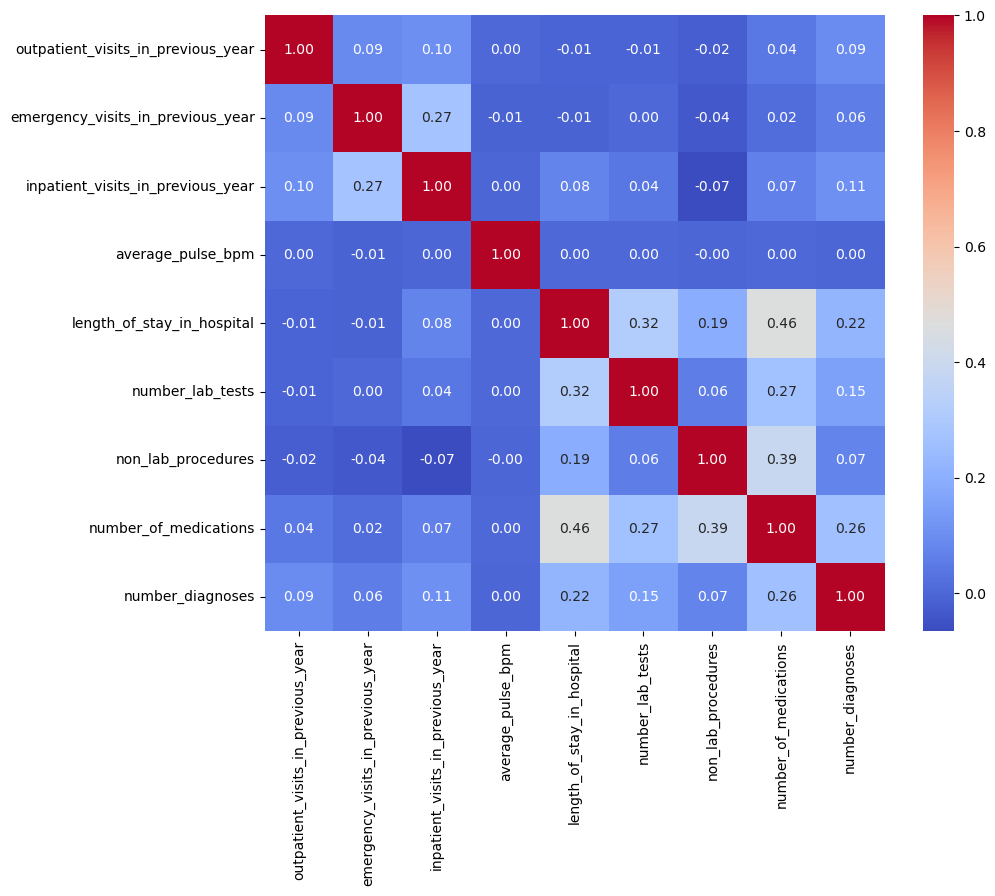

In [17]:
# Select only the numerical columns
numerical_df = data_train_mode.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.show()

In [18]:
## no correlation 'average_pulse_bpm'
data_train_corr = data_train_mode.drop(columns=['average_pulse_bpm'])

In [19]:
data_train_corr.head(10)

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,discharge_disposition,admission_source,length_of_stay_in_hospital,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,Female,[70-80),0,0,2,Emergency,Discharged to home,Emergency Room,2,...,20,515,276,466,8,No,No,[],No,>30 days
426224,AfricanAmerican,Male,[50-60),0,0,0,Emergency,Discharged/transferred to a federal health car...,Clinic Referral,14,...,25,38,785,162,9,No,Yes,['insulin'],No,No
634063,Caucasian,Female,[60-70),0,0,1,Emergency,Discharged to home,Emergency Room,6,...,22,534,135,250,6,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,AfricanAmerican,Male,[60-70),0,0,1,Emergency,Discharged to home,Transfer from another health care facility,6,...,9,569,562,455,5,No,No,[],No,No
654194,Caucasian,Female,[70-80),1,0,0,Elective,Discharged/transferred to home with home healt...,Physician Referral,6,...,15,715,599,428,9,No,No,[],No,>30 days
269878,Caucasian,Female,[50-60),0,0,0,Emergency,Discharged to home,Emergency Room,3,...,10,574,250,244,3,No,No,[],No,>30 days
182051,Caucasian,Female,[50-60),0,0,0,Emergency,Discharged to home,Emergency Room,1,...,13,786,250.02,493,9,Ch,Yes,"['metformin', 'glimepiride']",No,No
964239,Other,Male,[70-80),0,0,0,Elective,Discharged/transferred to home with home healt...,Physician Referral,6,...,39,414,287,276,9,Ch,Yes,"['nateglinide', 'glipizide', 'insulin']",No,No
418598,Caucasian,Female,[50-60),1,0,0,Urgent,Discharged to home,Physician Referral,3,...,16,682,250.02,276,9,No,Yes,['insulin'],No,No


In [20]:
data_train_corr['age'].value_counts()

age
[70-80)     20916
[60-70)     14908
[80-90)     11510
[50-60)     11423
[40-50)      6418
[30-40)      2536
[90-100)     1875
[20-30)      1071
[10-20)       474
[0-10)        105
Name: count, dtype: int64

# Encoding

In [21]:
## Encode age seperate

# Define the mapping
age_mapping = {
    '[0-10)': 1,
    '[10-20)': 2,
    '[20-30)': 3,
    '[30-40)': 5,
    '[40-50)': 6,
    '[50-60)': 7,
    '[60-70)': 9,
    '[70-80)': 10,
    '[80-90)': 8,
    '[90-100)': 4
}

# Apply the mapping to the 'age' column
data_train_corr['age'] = data_train_corr['age'].map(age_mapping)

In [22]:
## Encode gender seperate

data_train_corr['gender'] = data_train_corr['gender'].map({'Male': 1, 'Female': 0})


# manually dropt 3 rows where gender is nan
data_train_corr.dropna(subset=['gender'])



,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,discharge_disposition,admission_source,length_of_stay_in_hospital,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,0.0,10,0,0,2,Emergency,Discharged to home,Emergency Room,2,...,20,515,276,466,8,No,No,[],No,>30 days
426224,AfricanAmerican,1.0,7,0,0,0,Emergency,Discharged/transferred to a federal health car...,Clinic Referral,14,...,25,38,785,162,9,No,Yes,['insulin'],No,No
634063,Caucasian,0.0,9,0,0,1,Emergency,Discharged to home,Emergency Room,6,...,22,534,135,250,6,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,AfricanAmerican,1.0,9,0,0,1,Emergency,Discharged to home,Transfer from another health care facility,6,...,9,569,562,455,5,No,No,[],No,No
654194,Caucasian,0.0,10,1,0,0,Elective,Discharged/transferred to home with home healt...,Physician Referral,6,...,15,715,599,428,9,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,AfricanAmerican,0.0,8,0,1,0,Elective,Discharged to home,Physician Referral,7,...,18,453,786,250,9,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
826429,AfricanAmerican,0.0,10,0,0,0,Urgent,Discharged to home,Physician Referral,9,...,9,157,197,V66,6,Ch,Yes,"['metformin', 'glyburide']",No,No
332030,Caucasian,0.0,9,0,2,2,Emergency,Not Mapped,Emergency Room,5,...,24,428,491,276,9,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days


In [23]:
## LabelEncoding

# Create a label encoder
label_encoder = LabelEncoder()

# Define the columns you want to encode
columns_to_encode = ['discharge_disposition', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']

# Loop through each column and apply label encoding
for column in columns_to_encode:
    data_train_corr[column] = label_encoder.fit_transform(data_train_corr[column])

In [24]:
data_train_corr.head()

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,discharge_disposition,admission_source,length_of_stay_in_hospital,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,0.0,10,0,0,2,Emergency,1,Emergency Room,2,...,20,337,122,291,8,No,No,[],No,>30 days
426224,AfricanAmerican,1.0,7,0,0,0,Emergency,4,Clinic Referral,14,...,25,229,485,24,9,No,Yes,['insulin'],No,No
634063,Caucasian,0.0,9,0,0,1,Emergency,1,Emergency Room,6,...,22,355,10,80,6,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,AfricanAmerican,1.0,9,0,0,1,Emergency,1,Transfer from another health care facility,6,...,9,379,345,281,5,No,No,[],No,No
654194,Caucasian,0.0,10,1,0,0,Elective,11,Physician Referral,6,...,15,488,377,257,9,No,No,[],No,>30 days


In [25]:
## Use One Hot Encoder technique

data_train_hot_encoded = pd.get_dummies(data_train_corr, columns=['race'], prefix='race').replace({True: 1, False: 0})
data_train_hot_encoded = pd.get_dummies(data_train_hot_encoded, columns=['admission_type'], prefix='admission_type').replace({True: 1, False: 0})
data_train_hot_encoded = pd.get_dummies(data_train_hot_encoded, columns=['admission_source'], prefix='admission_source').replace({True: 1, False: 0})

In [26]:
## Encode seperately the following columns

data_train_hot_encoded['change_in_meds_during_hospitalization'] = data_train_hot_encoded['change_in_meds_during_hospitalization'].map({'Ch': 1, 'No': 0})
data_train_hot_encoded['prescribed_diabetes_meds'] = data_train_hot_encoded['prescribed_diabetes_meds'].map({'Yes': 1, 'No': 0})

In [27]:
data_train_hot_encoded.dtypes

gender                                                                         float64
age                                                                              int64
outpatient_visits_in_previous_year                                               int64
emergency_visits_in_previous_year                                                int64
inpatient_visits_in_previous_year                                                int64
discharge_disposition                                                            int32
length_of_stay_in_hospital                                                       int64
number_lab_tests                                                                 int64
non_lab_procedures                                                               int64
number_of_medications                                                            int64
primary_diagnosis                                                                int32
secondary_diagnosis                        

In [28]:
## column medication

# Remove rows with NaN values in the 'medication' column
data_train_hot_encoded = data_train_hot_encoded.dropna(subset=['medication'])

# Extract unique medications from the 'medication' column
unique_medications = set()

# Iterate through each row in the 'medication' column and add the medications to the set
for medication_list in data_train_hot_encoded['medication']:
    medications = medication_list.strip('[]').replace(" ", "").split(',')
    unique_medications.update(medications)

# Convert the set to a list to count the unique medications
unique_medications_list = list(unique_medications)

# Create binary columns for each unique medication and set values to 1 if present, 0 if not
for medication in unique_medications_list:
    data_train_hot_encoded[medication] = data_train_hot_encoded['medication'].apply(lambda x: 1 if medication in x else 0)

# Drop the original 'medication' column
data_train_hot_encoded = data_train_hot_encoded.drop(columns=['medication'])

In [29]:
data_train_hot_encoded['readmitted_binary'].isna().sum()

0

In [30]:
## readmitted binary 

## Binary target: Yes if patient was readmitted in <30 days, No otherwise

# data_train['readmitted_binary'] = data_train['readmitted_binary'].map({'Yes': 1, 'No': 0})
data_train_hot_encoded['readmitted_binary'] = data_train_hot_encoded['readmitted_binary'].map({'Yes': 1, 'No': 0})
data_train_hot_encoded['readmitted_binary']

encounter_id
533253    0
426224    0
634063    0
890610    0
654194    0
         ..
660160    0
826429    0
332030    1
757560    0
459757    0
Name: readmitted_binary, Length: 71236, dtype: int64

# Models

In [63]:
data_train_models = data_train_hot_encoded.copy()
data_train_models = data_train_models.dropna(subset=['gender'])

In [64]:
# Extract features and target variable
X = data_train_models.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y = data_train_models['readmitted_binary']

In [65]:
# Identify binary columns (assuming binary columns have values 0 or 1)
binary_columns = [col for col in X.columns if set(X[col]) == {0, 1}]

# Separate non-binary columns
non_binary_columns = [col for col in X.columns if col not in binary_columns]

# Create a copy of the DataFrame to preserve the original data
X_scaled = X.copy()

# Initialize the MinMaxScaler to normalize between 0 and 1
scaler = MinMaxScaler()

# Apply scaling to non-binary columns
X_scaled[non_binary_columns] = scaler.fit_transform(X[non_binary_columns])

# The X_scaled DataFrame now contains normalized non-binary features between 0 and 1, while binary columns remain unchanged
# Converted every column into float
X_scaled = X_scaled.astype(float)
X_scaled.head()

,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,discharge_disposition,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_Elective,admission_type_Emergency,admission_type_Newborn,admission_type_Not Available,admission_type_Not Mapped,admission_type_Trauma Center,admission_type_Urgent,admission_source_ Court/Law Enforcement,admission_source_ Emergency Room,admission_source_ Extramural Birth,admission_source_ Not Available,admission_source_ Not Mapped,admission_source_ Physician Referral,admission_source_ Sick Baby,admission_source_ Transfer from Ambulatory Surgery Center,admission_source_ Transfer from a Skilled Nursing Facility (SNF),admission_source_ Transfer from another health care facility,admission_source_ Transfer from critial access hospital,admission_source_ Transfer from hospital inpt/same fac reslt in a sep claim,admission_source_Clinic Referral,admission_source_HMO Referral,admission_source_Normal Delivery,admission_source_Transfer from a hospital,,'repaglinide','glimepiride','glipizide-metformin','miglitol','metformin','chlorpropamide','glipizide','nateglinide','pioglitazone','metformin-rosiglitazone','troglitazone','glimepiride-pioglitazone','tolazamide','tolbutamide','rosiglitazone','metformin-pioglitazone','insulin','glyburide-metformin','glyburide','acetohexamide','acarbose'
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
533253,0.0,1.000000,0.00000,0.0,0.095238,0.041667,0.076923,0.391667,0.000000,0.256757,0.491971,0.175036,0.390604,0.466667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426224,1.0,0.666667,0.00000,0.0,0.000000,0.166667,1.000000,0.583333,0.000000,0.324324,0.334307,0.695839,0.032215,0.533333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
634063,0.0,0.888889,0.00000,0.0,0.047619,0.041667,0.384615,0.491667,0.166667,0.283784,0.518248,0.014347,0.107383,0.333333,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
890610,1.0,0.888889,0.00000,0.0,0.047619,0.041667,0.384615,0.391667,0.333333,0.108108,0.553285,0.494978,0.377181,0.266667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654194,0.0,1.000000,0.02381,0.0,0.000000,0.458333,0.384615,0.383333,0.166667,0.189189,0.712409,0.540890,0.344966,0.533333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
X = X.dropna(subset=['gender'])

In [67]:
## Splitting and oversampling

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 50568, 1: 50568}


In [69]:
## create a model

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1}')

F1 Score: 0.04730139478471801
